2022-10-17 14:43:11,716 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-10-17 14:43:11,716 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-10-17 14:43:11,719 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-10-17 14:43:11,719 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-10-17 14:43:11,722 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-10-17 14:43:11,722 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-10-17 14:43:11,724 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-10-17 14:43:11,724 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-10-17 14:43:11,727 - INFO - tvb_multiscale.tv

Outputs' path: /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/tvb_nest_rs_FIC
Config (
  title .............................. 'Config gid: 6e619097-0630-4dbf-84c1-621a5855549a'
  Type ............................... 'Config'
  gid ................................ UUID('6e619097-0630-4dbf-84c1-621a5855549a')
  config.gid ......................... UUID('6e619097-0630-4dbf-84c1-621a5855549a')
  config.title ....................... 'Config gid: 6e619097-0630-4dbf-84c1-621a5855549a'
  config.log ......................... <Logger tvb_multiscale.tvb_nest.config (DEBUG)>
  config.out ......................... OutputConfig gid: 5e5d9cb5-fe75-4a13-97b5-36bb8eded2cc
  config.figures ..................... <tvb.simulator.plot.config.FiguresConfig object at 0x7f1b69f5d3a0>
  config.DEFAULT_SUBJECT[connectivity]  Connectivity gid: 6a2482ce-b5f2-4b8c-b381-0cbfc8877894
  config.DEFAULT_SUBJECT[cortex] ..... Cortex gid: e56fcbc8-5d17-4a91-b35c-08f646e78d9d
  config.D

Normalizing connectivity weights with 99 percentile!
Configuring model with parameters:
OrderedDict([('G', 1.0), ('STIMULUS', 0.0), ('I_e', -0.35), ('I_s', 0.08), ('w_ie', -3.0), ('w_rs', -2.0)])


/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/node_set.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, nodes=pd.Series(), **kwargs):
/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/devices.py:953: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, device_set=pd.Series(), **kwargs):


Fixing thalamocortical weights!
Fixing thalamocortical delays!
Applying FIC = 1!


<Figure size 432x288 with 0 Axes>

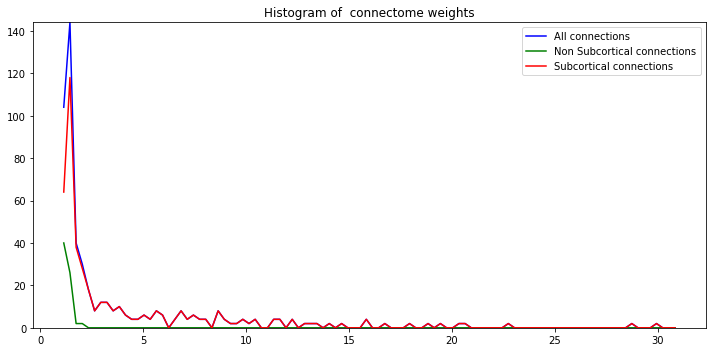

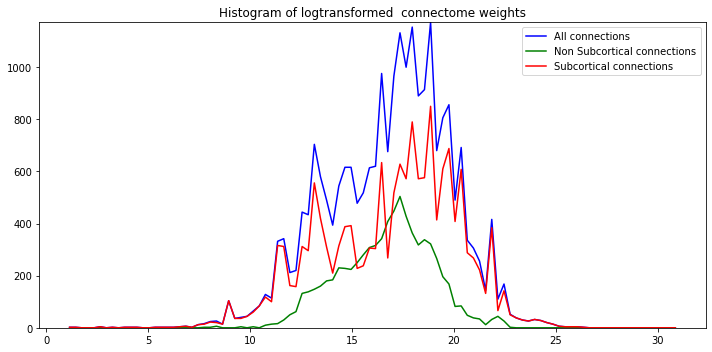

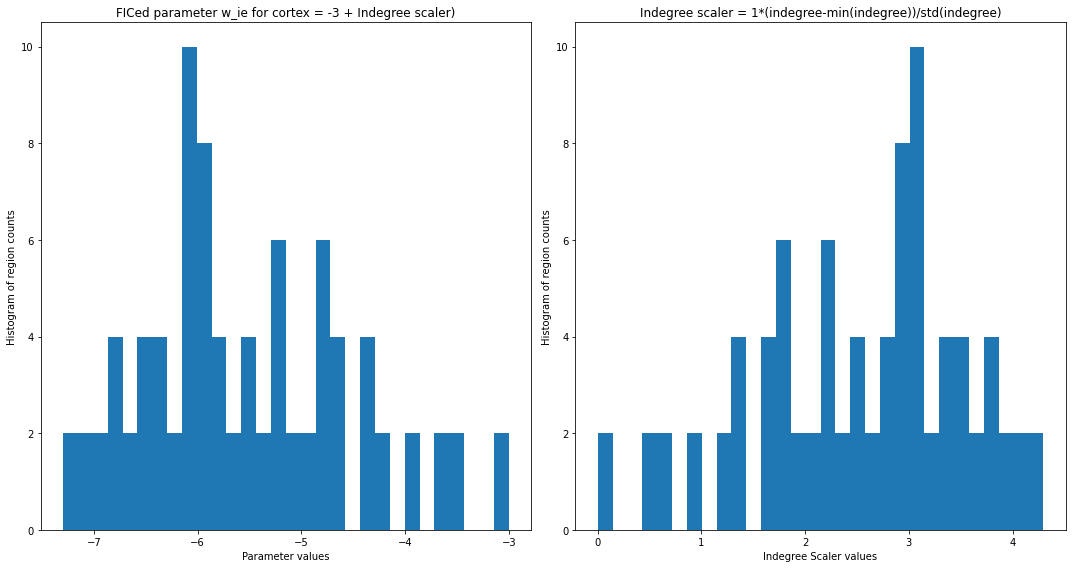

/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:293: UserWarning: 
  warnings.warn(str(e))


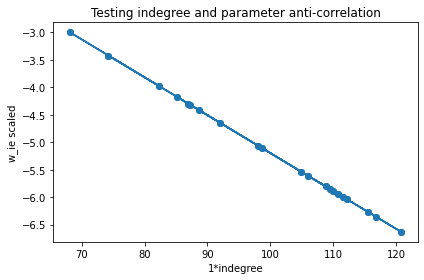

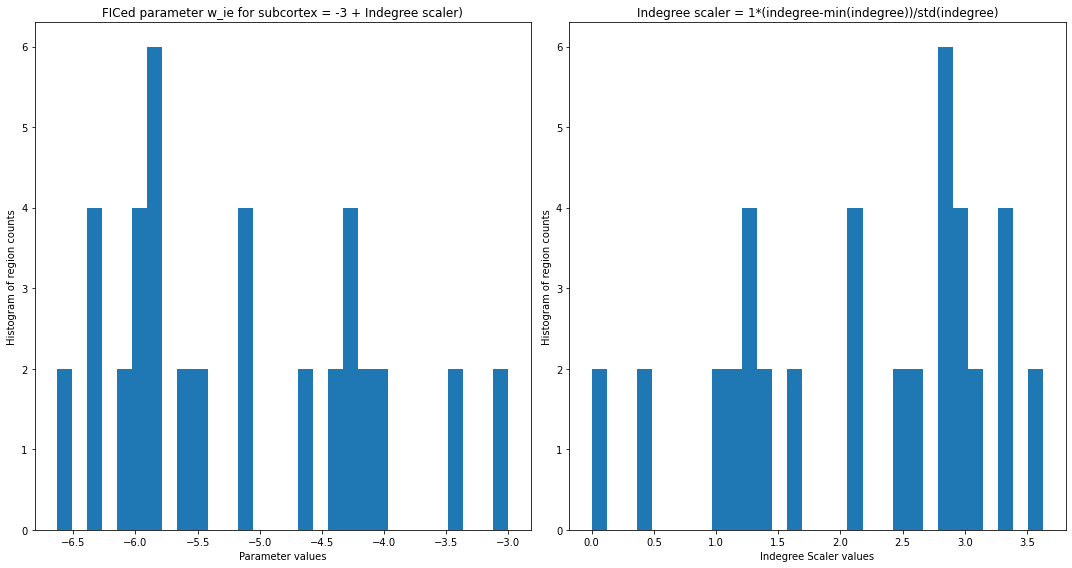

2022-10-17 14:43:15,721 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!


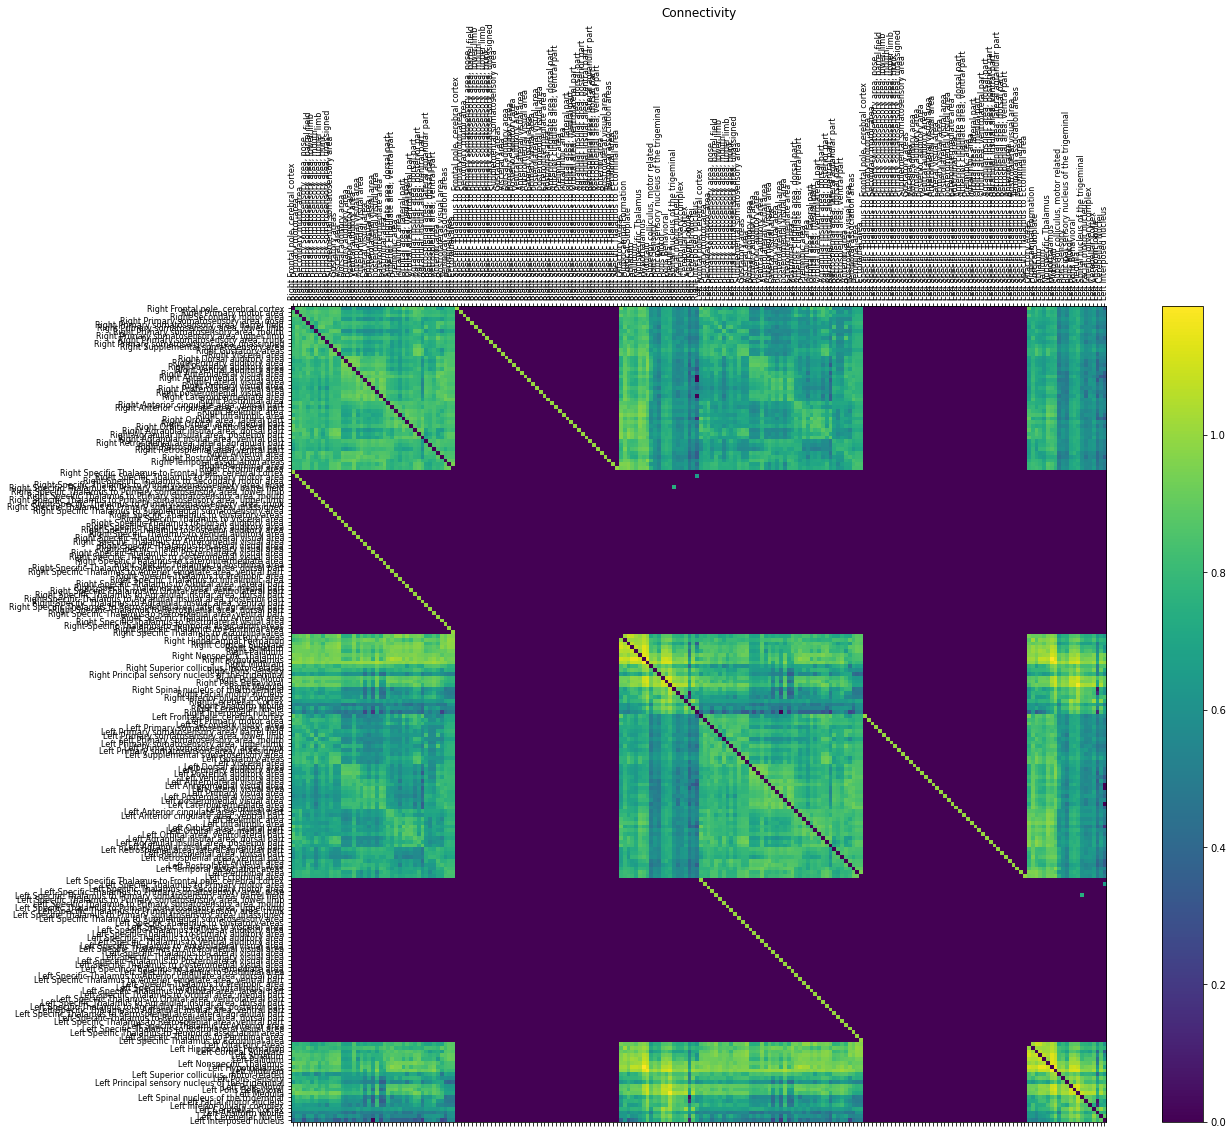

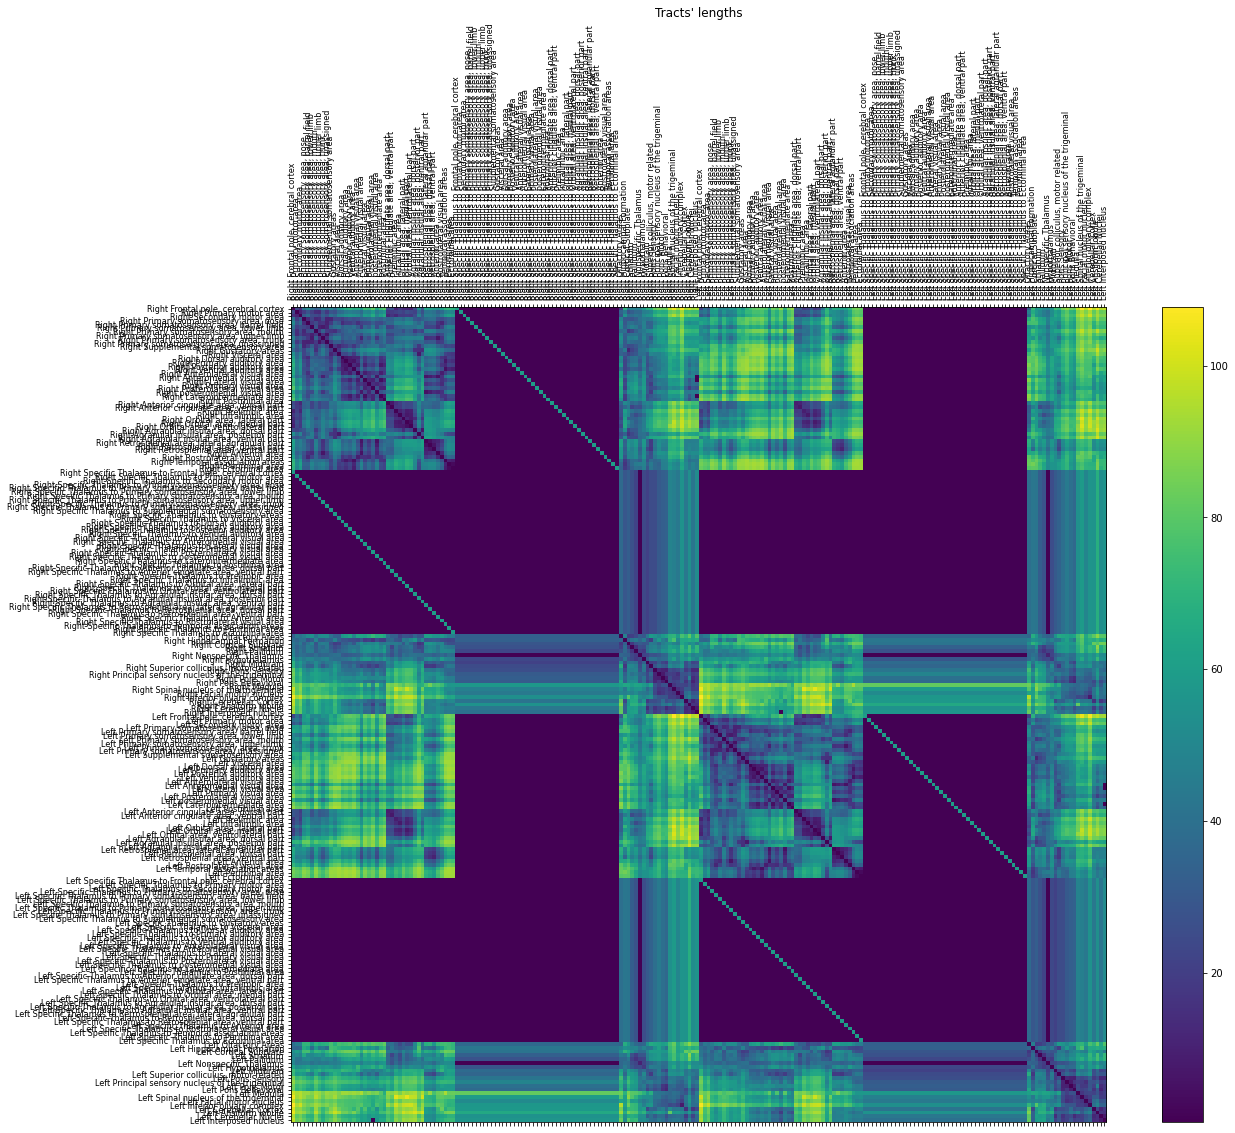

In [1]:
from examples.tvb_nest.notebooks.cerebellum.scripts.scripts import *

from examples.tvb_nest.notebooks.cerebellum.scripts.base import DEFAULT_ARGS

# Code repeating what is done in scripts.tvb_nest_script.run_tvb_nest_workflow() function:

# Inputs to run_tvb_nest_workflow()
PSD_target = None
model_params = {"STIMULUS": 0.0}
config = None
write_files = True
config_args = {"output_folder": "tvb_nest_rs"}

plot_flag = config_args.get('plot_flag', DEFAULT_ARGS.get('plot_flag'))
config, plotter = assert_config(config, return_plotter=True, **config_args)
config.model_params.update(model_params)
if config.VERBOSE:
    print("\n\n------------------------------------------------\n\n"+
          "Running TVB-NEST workflow for plot_flag=%s, write_files=%s,\nand model_params=\n%s...\n" 
          % (str(plot_flag), str(write_files), str(config.model_params)))
# config.SIMULATION_LENGTH = 100.0

# Load and prepare connectome and connectivity with all possible normalizations:
connectome, major_structs_labels, voxel_count, inds, maps = prepare_connectome(config, plotter=plotter)
connectivity = build_connectivity(connectome, inds, config)

# Prepare model
model = build_model(connectivity.number_of_regions, inds, maps, config)

# Prepare simulator
simulator = build_simulator(connectivity, model, inds, maps, config, plotter=plotter)


In [2]:
simulator.model.G[0].item()

0.0078125

In [3]:
# Build NEST network
nest_network, nest_nodes_inds, neuron_models, neuron_number = build_NEST_network(config)



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@c545255f7
 Built: May 18 2022 09:50:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

FAILED! Needing to compile it first!
Compiling cereb module...



-------------------------------------------------------
cerebmodule Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/c++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -std=c++11 -O2 -Wall -fopenmp  -fdiagnostics-color=auto
NEST include dirs    :  -I/home/docker/env/neurosci/nest_build/include/nest -I/usr/include -I/usr/include -I/usr/include -I/usr/include
NEST libraries flags : -L/home/docker/env/neurosci/nest_build/lib/nest -lnestutil -lnest -lsli -lnestkernel -fopenmp /usr/lib/x86_64-linux-gnu/libltdl.so /usr/lib/x86_64-linux-gnu/libreadline.so /usr/lib/x86_64-linux-gnu/libncurses.so /usr/lib/x86_64-linux-gnu/libgsl.so /usr/lib/x86_64-linux-gnu/libgslcblas.so   /usr/lib/libmpicxx.so /usr/lib/libmpi.so

-------------------------------------------------------

You can now build and install 'cerebmodule' using
  make
  make install

The library file libcerebmodule.so will be installed to
  /home

(b'-- Configuring done\n-- Generating done\n-- Build files have been written to: /home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/cereb/build\n[ 50%] Built target cerebmodule_module\n[100%] Built target cerebmodule_lib\n[ 50%] Built target cerebmodule_module\n[100%] Built target cerebmodule_lib\nInstall the project...\n-- Install configuration: ""\n-- Up-to-date: /home/docker/env/neurosci/nest_build/cerebmodule.so\n', None)
Installing cereb module...
Building NESTNetwork...
2022-10-17 14:43:50,838 - INFO - tvb_multiscale.core.spiking_models.network - <class 'tvb_multiscale.tvb_nest.nest_models.network.NESTNetwork'> created!

Oct 17 14:43:50 SetStatus [Error]: 
    Variable data_path not set: Directory 'sim_data/' does not exist.
2022-10-17 14:43:50,838 - INFO - tvb_multiscale.core.spiking_models.network - <class 'tvb_multiscale.tvb_nest.nest_models.network.NESTNetwork'> created!
2022-10-17 14:43:53,398 - INFO - tvb_multiscale.core.spiking_models.devices - <clas

In [4]:
#nest.Install('cerebmodule')

In [5]:
# pwd=os.getcwd()
# import nest
# import subprocess
# cereb_path = '/home/docker/packages/tvb-multiscale/tvb_multiscale/tvb_nest/nest/modules/cereb'
# os.chdir(os.path.join(cereb_path, 'build'))
# p = subprocess.Popen("cmake -Dwith-nest=/home/docker/env/neurosci/nest_build/bin/nest-config ..; make; make install",
#                              stdout=subprocess.PIPE, shell=True)
# print(p.communicate())

# nest.Install('cerebmodule')
# os.chdir(pwd)

In [6]:
#before running the below code, make sure that you locally add the file here: 
# /home/docker/packages/tvb-multiscale/examples/data/cerebellum/balanced_DCN_IO.hdf5
# nest_network, nest_nodes_inds, neuron_models, neuron_number = build_NEST_network(config)

In [7]:
# nest_network.nest_instance.Simulate(config.SIMULATION_LENGTH)

# nest_network = simulate_nest_network(nest_network, config, neuron_models, neuron_number, plot_flag=True)


In [8]:
# Build TVB-NEST interfaces
simulator, nest_network = build_tvb_nest_interfaces(simulator, nest_network, nest_nodes_inds, config)


2022-10-17 14:43:54,063 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['mossy_fibers'] created!
2022-10-17 14:43:54,063 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['mossy_fibers'] created!
2022-10-17 14:43:54,074 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['io_cell'] created!
2022-10-17 14:43:54,074 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for ['E']->['io_cell'] created!
2022-10-17 14:43:54,085 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.Devic

In [9]:
# Confirming that we got our special coupling for the TVB->NEST interface CosimCouplingMonitor:
simulator.cosim_monitors[0].coupling


In [10]:
# Simulate TVB-NEST model
results, transient, simulator, nest_network = simulate_tvb_nest(simulator, nest_network, config)


Simulating TVB-NEST...
2022-10-17 14:43:57,286 - ERROR - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Bad Simulator.integrator.noise.nsig shape: (2, 1, 1)
2022-10-17 14:43:57,301 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
...0.176% completed in 10.056 sec!!!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 1 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 2 last spike(s) of the input spiketrain


...0.186% completed in 10.6422 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 5 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 23 last spike(s) of the input spiketrain


...0.195% completed in 11.1946 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 8 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 31 last spike(s) of the input spiketrain


...0.205% completed in 11.805 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 26 last spike(s) of the input spiketrain


...0.215% completed in 12.3958 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 47 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 20 last spike(s) of the input spiketrain


...0.225% completed in 12.9713 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 36 last spike(s) of the input spiketrain


...0.234% completed in 13.5544 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 43 last spike(s) of the input spiketrain


...0.244% completed in 14.1508 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 25 last spike(s) of the input spiketrain


...0.254% completed in 14.76 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 69 last spike(s) of the input spiketrain


...0.273% completed in 15.9695 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 3 last spike(s) of the input spiketrain


...0.293% completed in 17.1509 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 14 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 7 last spike(s) of the input spiketrain


...0.303% completed in 17.7358 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 40 last spike(s) of the input spiketrain


...0.312% completed in 18.306 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 10 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 4 last spike(s) of the input spiketrain


...0.322% completed in 18.9359 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 9 last spike(s) of the input spiketrain


...0.342% completed in 20.0751 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 17 last spike(s) of the input spiketrain


...0.351% completed in 20.6663 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 12 last spike(s) of the input spiketrain


...0.361% completed in 21.22 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 6 last spike(s) of the input spiketrain
/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 27 last spike(s) of the input spiketrain


...0.371% completed in 21.7736 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 13 last spike(s) of the input spiketrain


...0.381% completed in 22.4051 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 11 last spike(s) of the input spiketrain


...0.478% completed in 28.1536 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 16 last spike(s) of the input spiketrain


...0.527% completed in 31.0734 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 19 last spike(s) of the input spiketrain


...0.644% completed in 38.056 sec!!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 15 last spike(s) of the input spiketrain


...0.693% completed in 40.9802 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 21 last spike(s) of the input spiketrain


...0.791% completed in 46.6638 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 22 last spike(s) of the input spiketrain


...0.830% completed in 48.9177 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 30 last spike(s) of the input spiketrain


...1.728% completed in 105.899 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 24 last spike(s) of the input spiketrain


...1.757% completed in 108.073 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 28 last spike(s) of the input spiketrain


...2.089% completed in 130.465 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 18 last spike(s) of the input spiketrain


...3.124% completed in 199.933 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 32 last spike(s) of the input spiketrain


...6.532% completed in 425.134 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 29 last spike(s) of the input spiketrain


...8.026% completed in 517.253 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 35 last spike(s) of the input spiketrain


...13.552% completed in 850.283 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 39 last spike(s) of the input spiketrain


...27.309% completed in 1658.98 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 33 last spike(s) of the input spiketrain


...46.426% completed in 3085.83 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 42 last spike(s) of the input spiketrain


...48.389% completed in 3247.59 sec!

/home/docker/env/neurosci/lib/python3.9/site-packages/elephant/conversion.py:1170: UserWarning:Binning discarded 34 last spike(s) of the input spiketrain


...100.000% completed in 7486.86 sec!
Simulated in 7489.559249 secs!


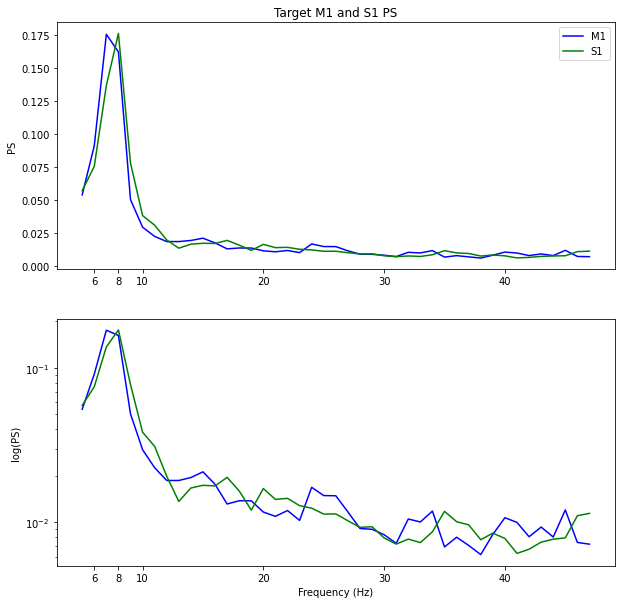

In [11]:
if PSD_target is None:
    # This is the PSD target we are trying to fit...
    if config.model_params['G']:
            # ...for a connected brain, i.e., PS of bilateral M1 and S1:
        PSD_target = compute_target_PSDs_m1s1brl(config, write_files=True, plotter=plotter)
    else:
        # ...for a disconnected brain, average PS of all regions:
        PSD_target = compute_target_PSDs_1D(config, write_files=True, plotter=plotter)

2022-10-17 16:48:46,068 - INFO - tvb.storage.h5.encryption.data_encryption_handler - Cannot import syncrypto library.
Pickle-dumping source_ts to /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/tvb_nest_rs_FIC/res/source_ts.pkl!


/home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/scripts/tvb_script.py:744: UserWarning:Failed to to write source time series to file with error!:
'TimeSeriesRegion' object has no attribute 'connectivity'


2022-10-17 16:49:05,883 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-10-17 16:49:05,893 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-10-17 16:49:06,420 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-10-17 16:49:06,999 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-10-17 16:49:07,524 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-10-17 16:49:07,530 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries labels agreement failed!
2022-10-17 16:49:08,034 - WARNING - tvb.contrib.scripts.datatypes.time_series_xarray - Connectivity and RegionTimeSeries lab

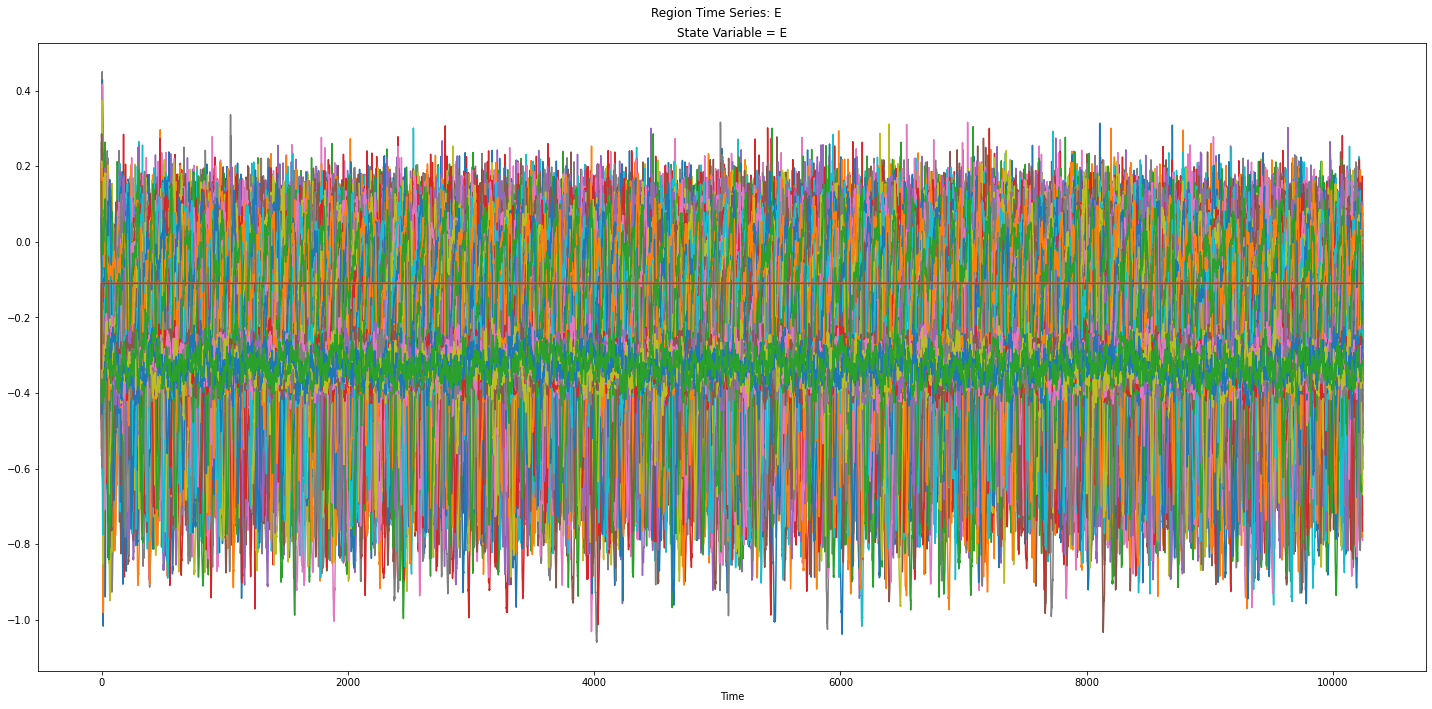

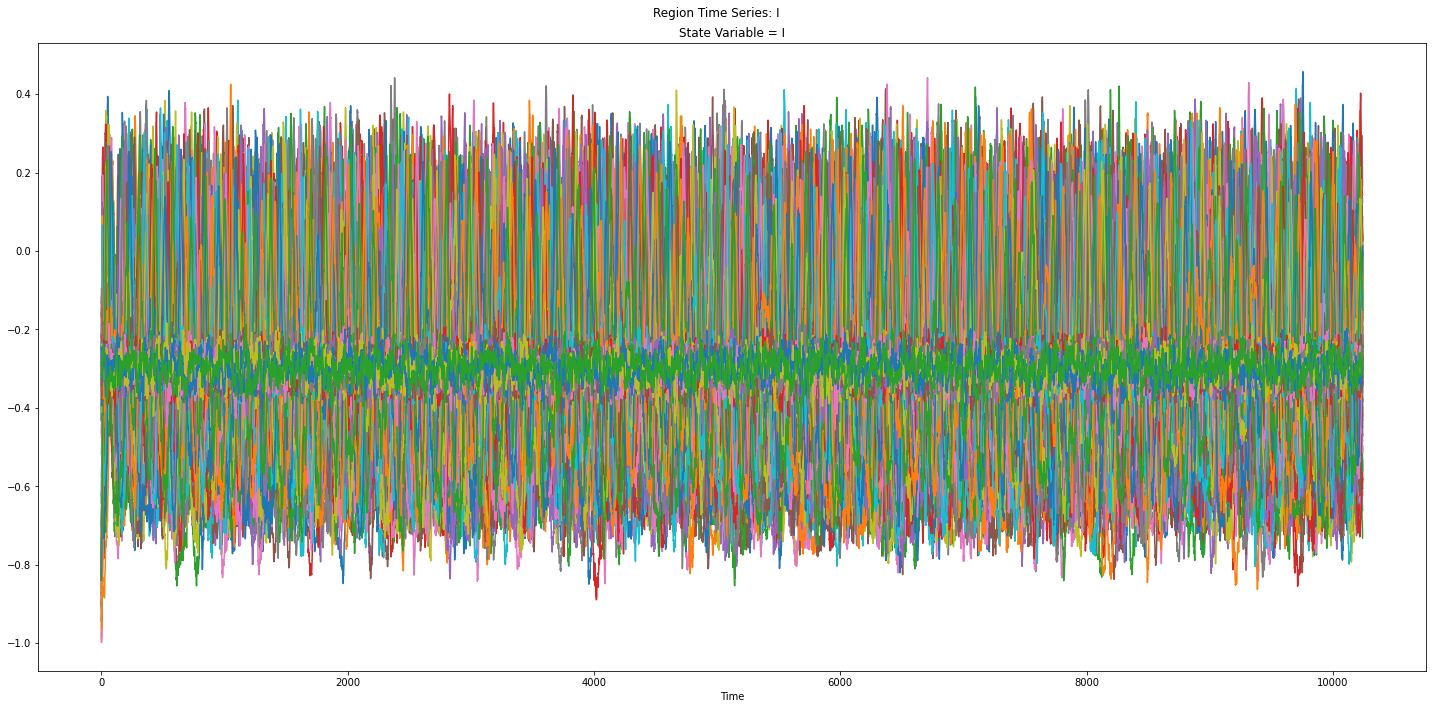

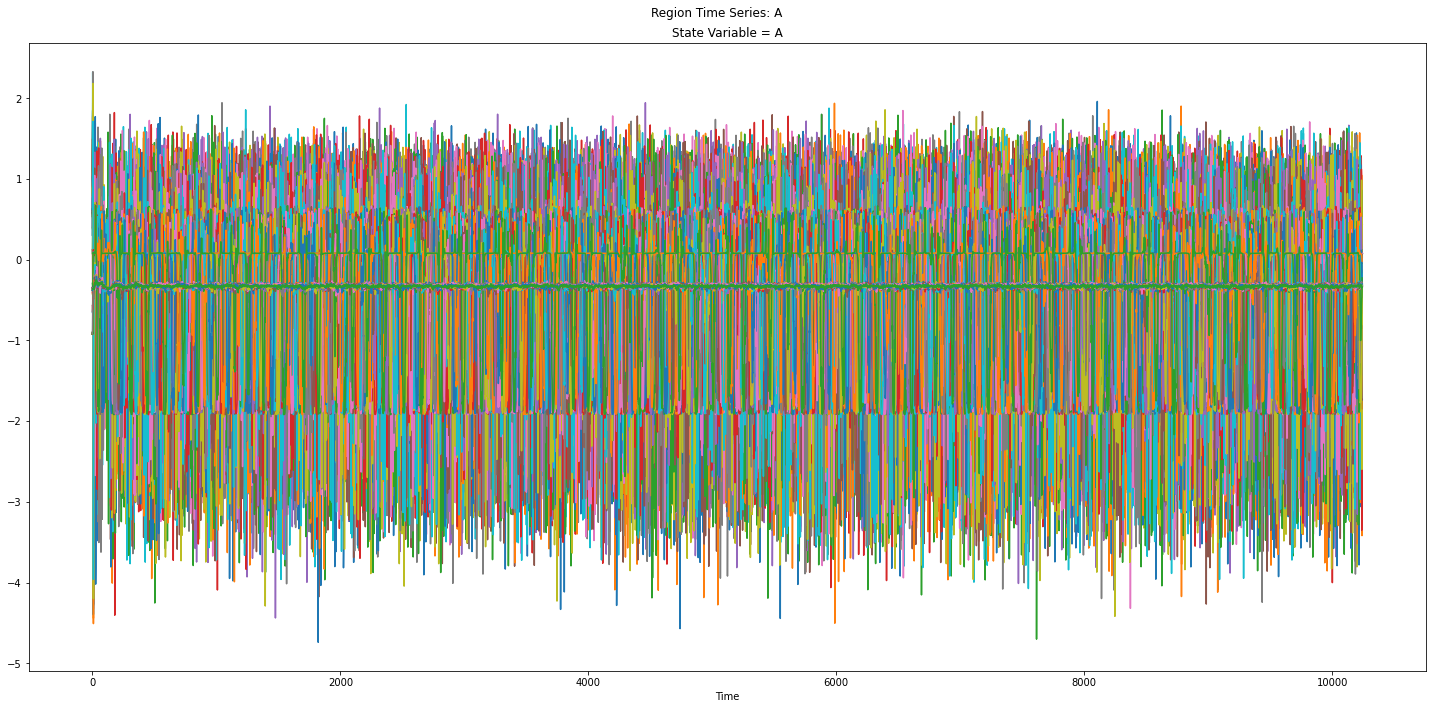

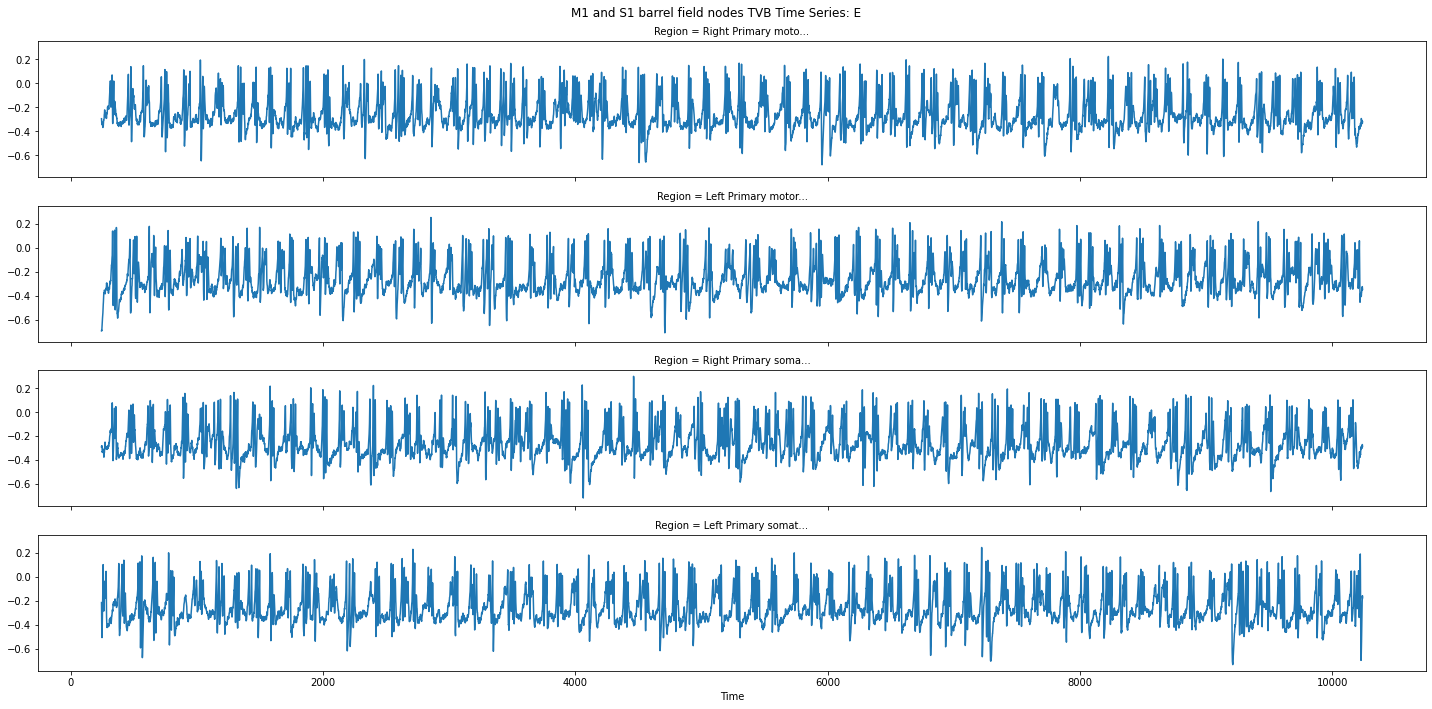

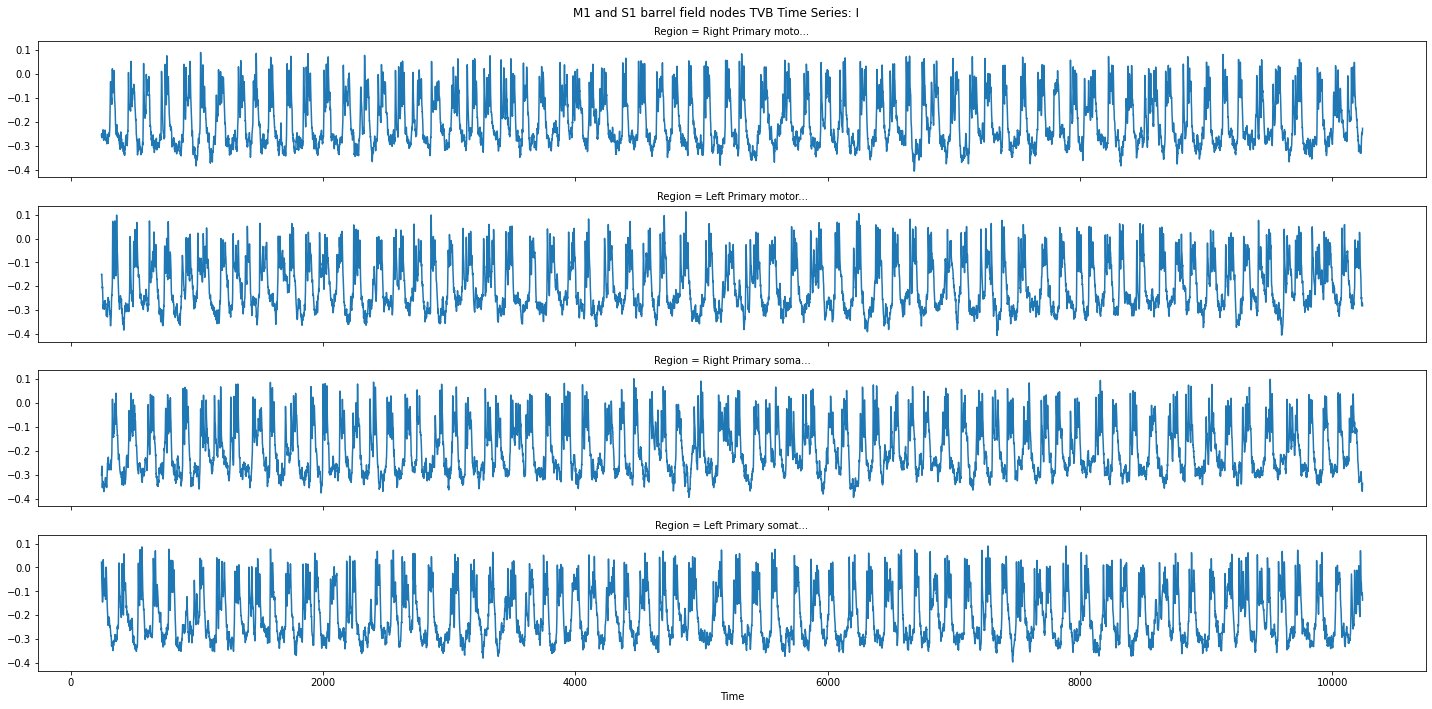

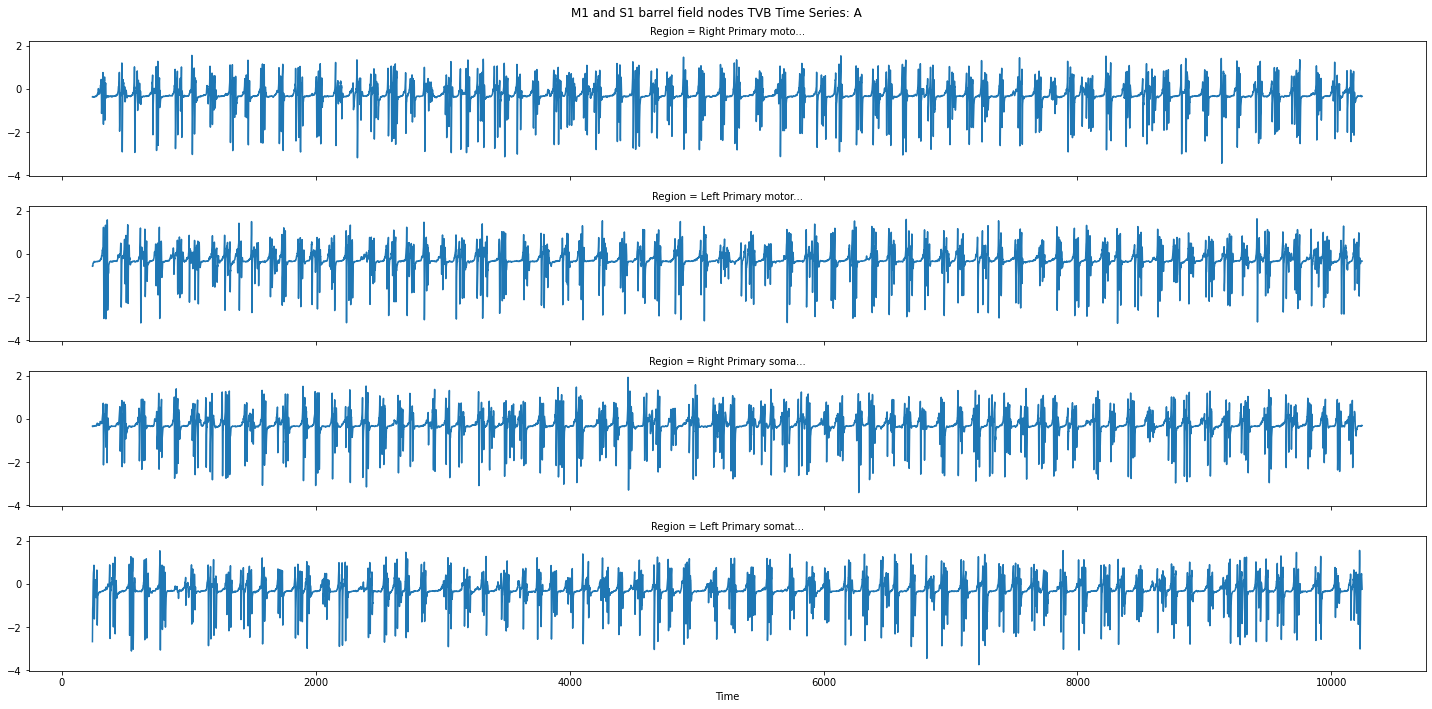

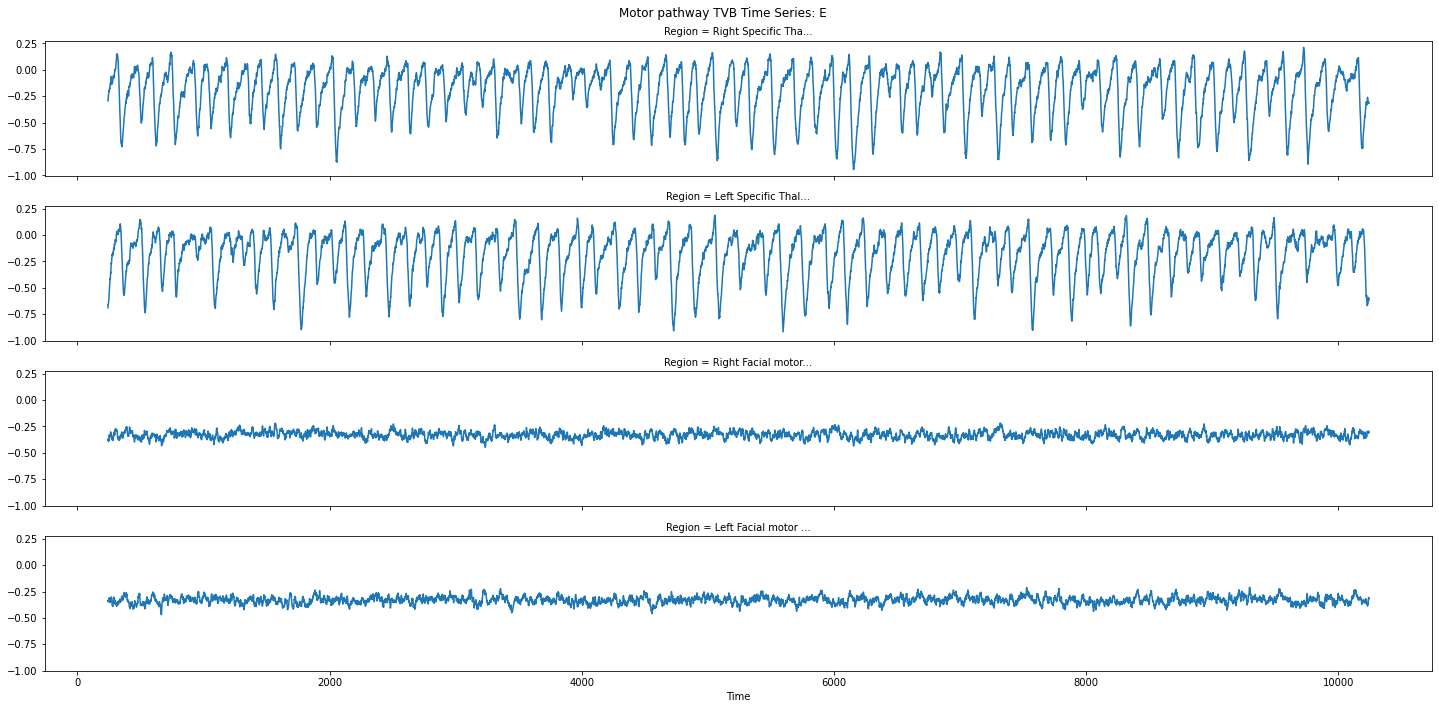

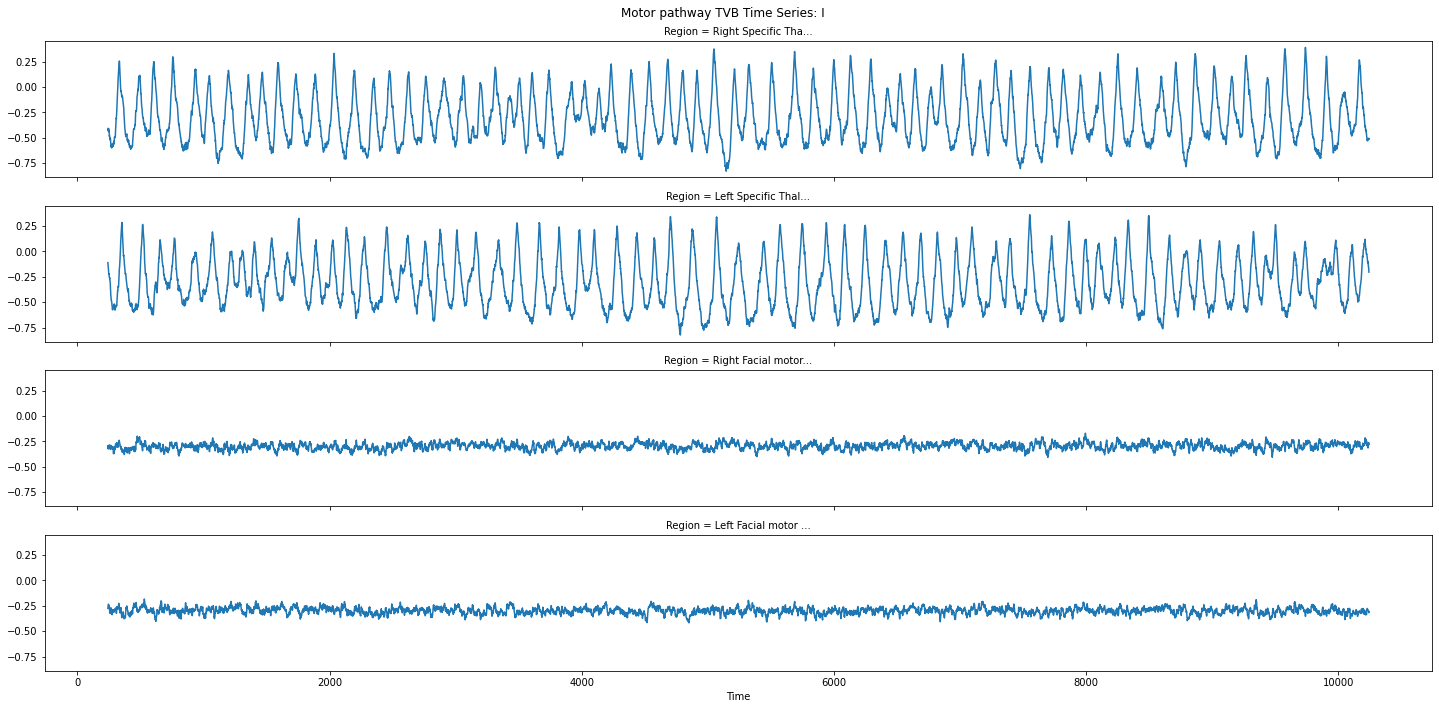

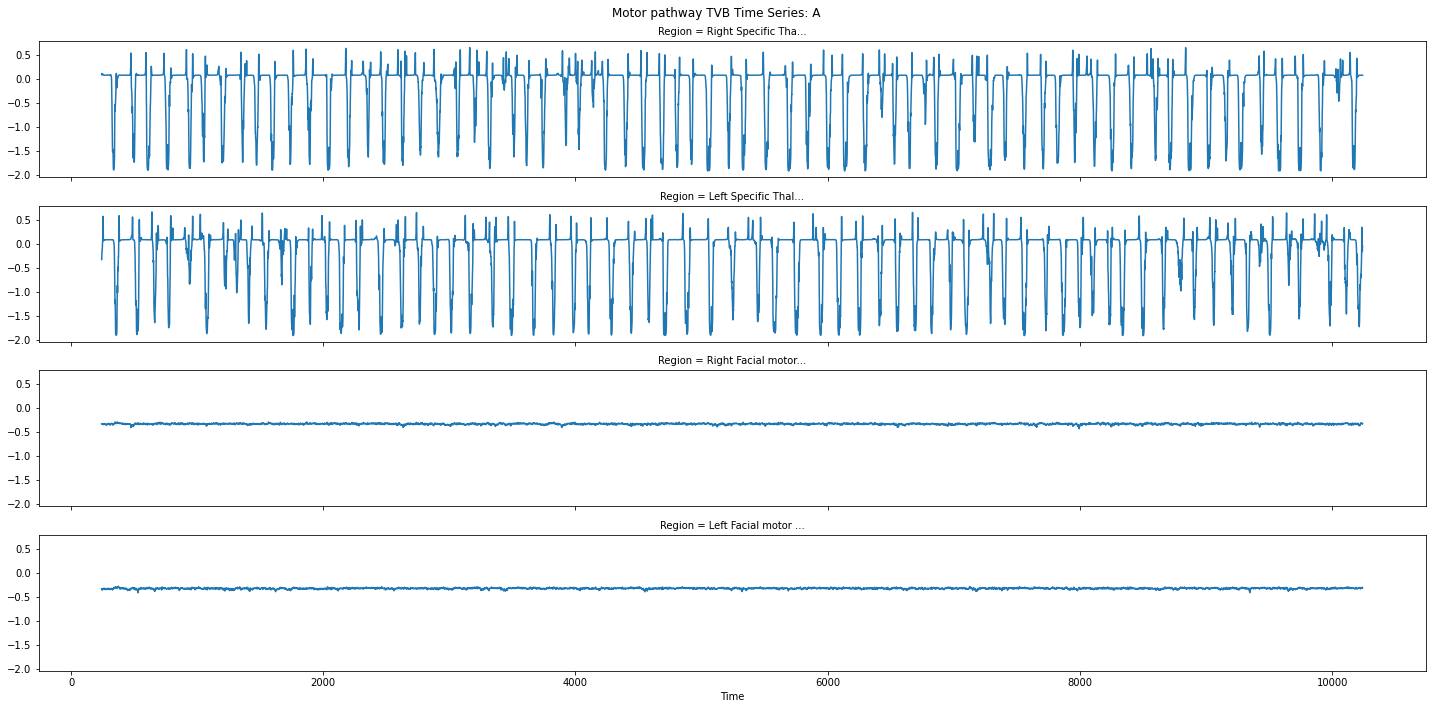

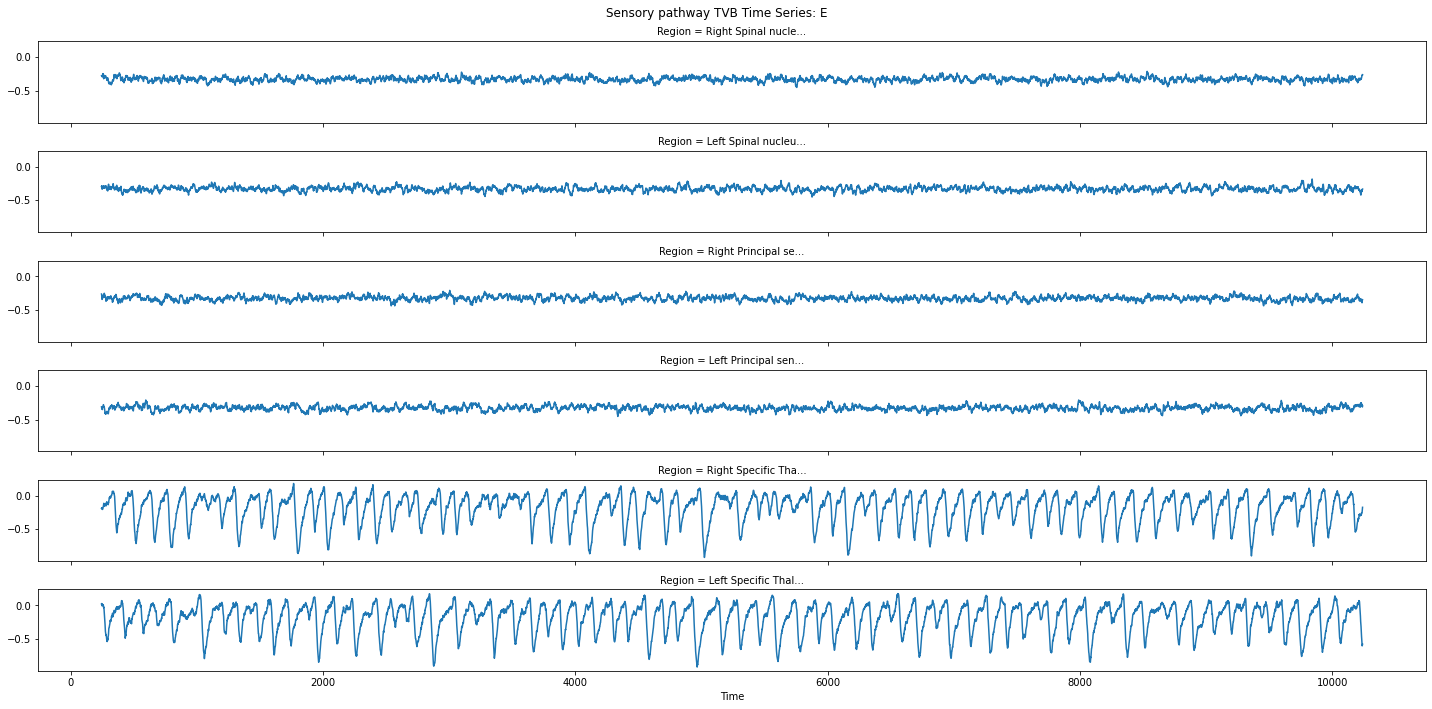

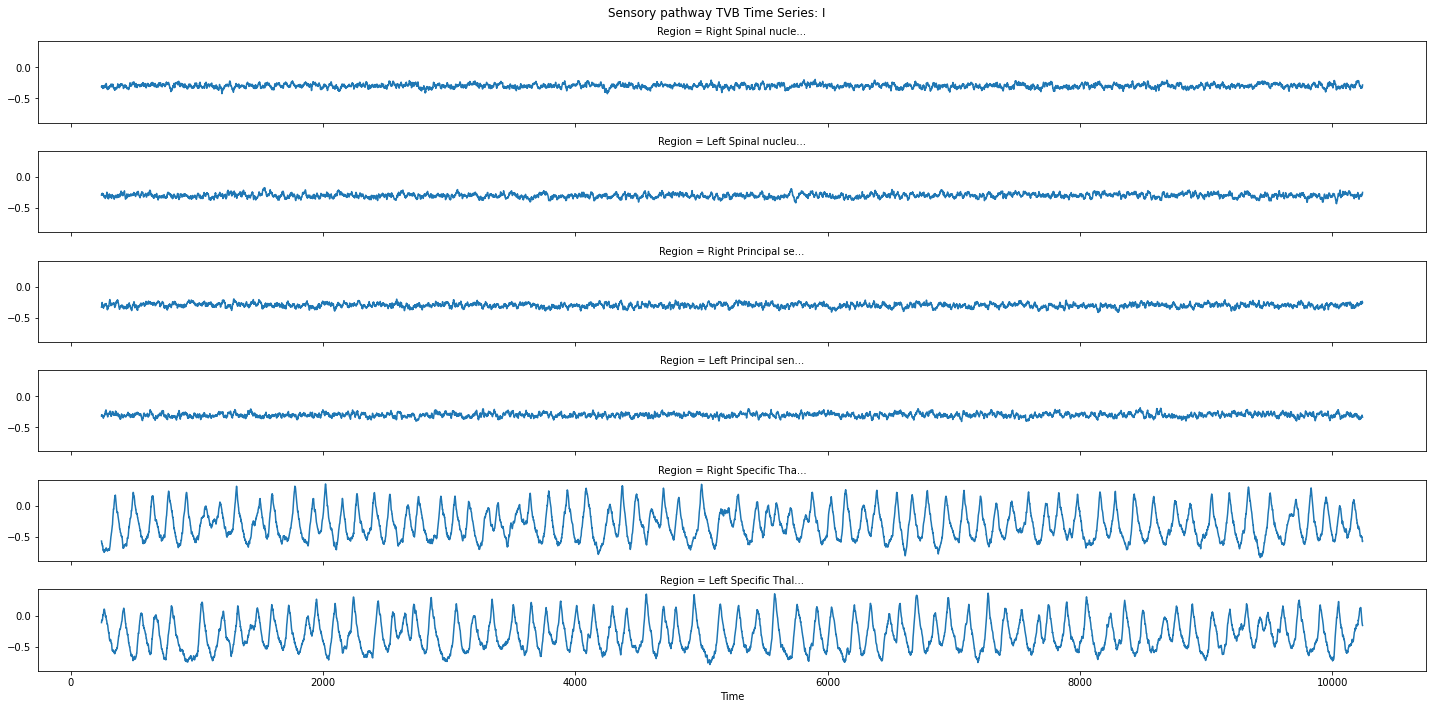

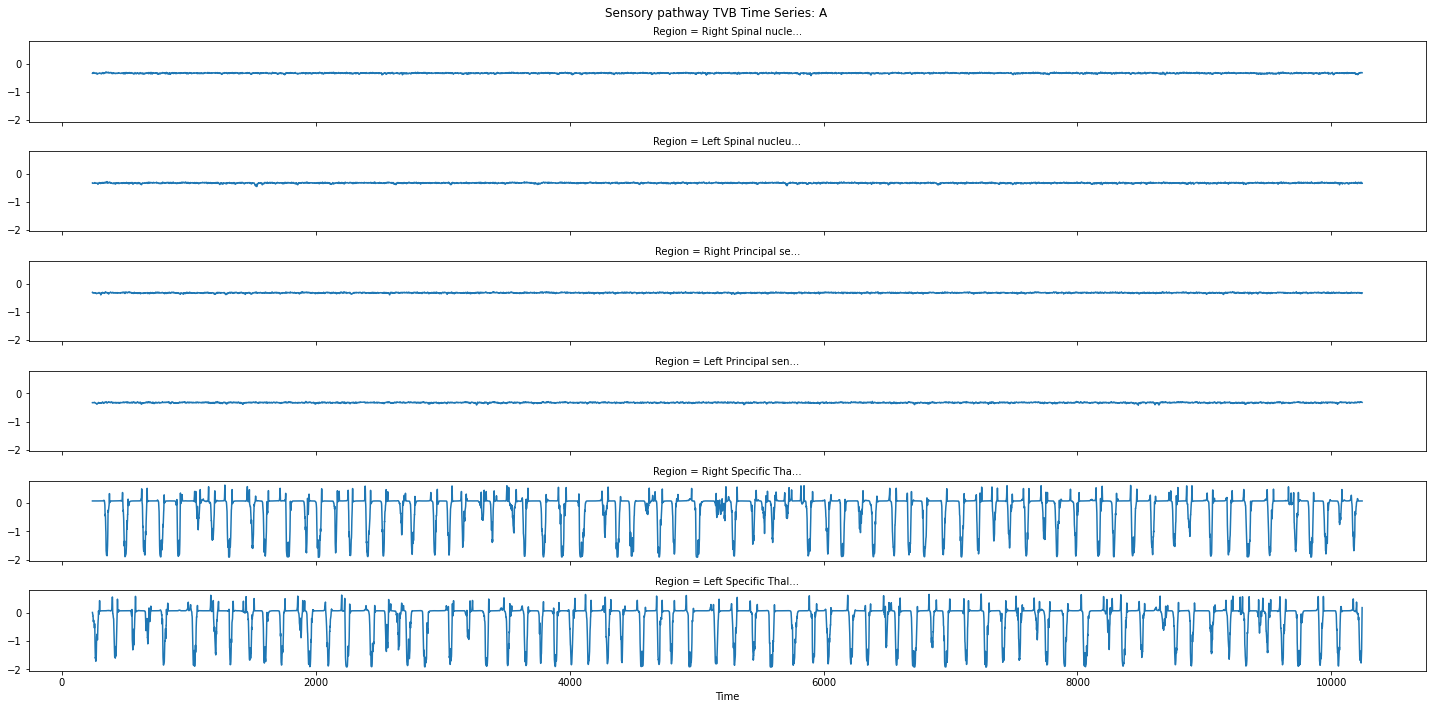

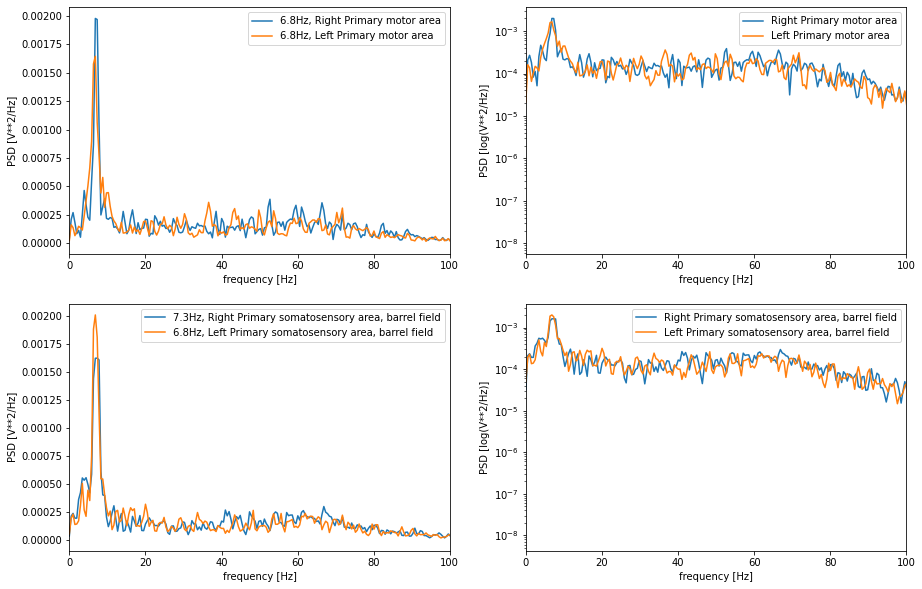

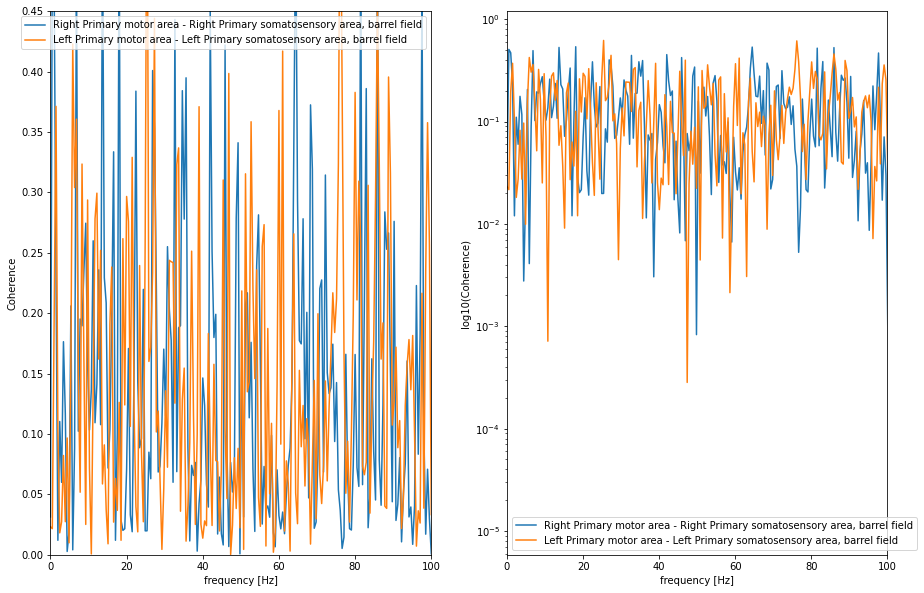

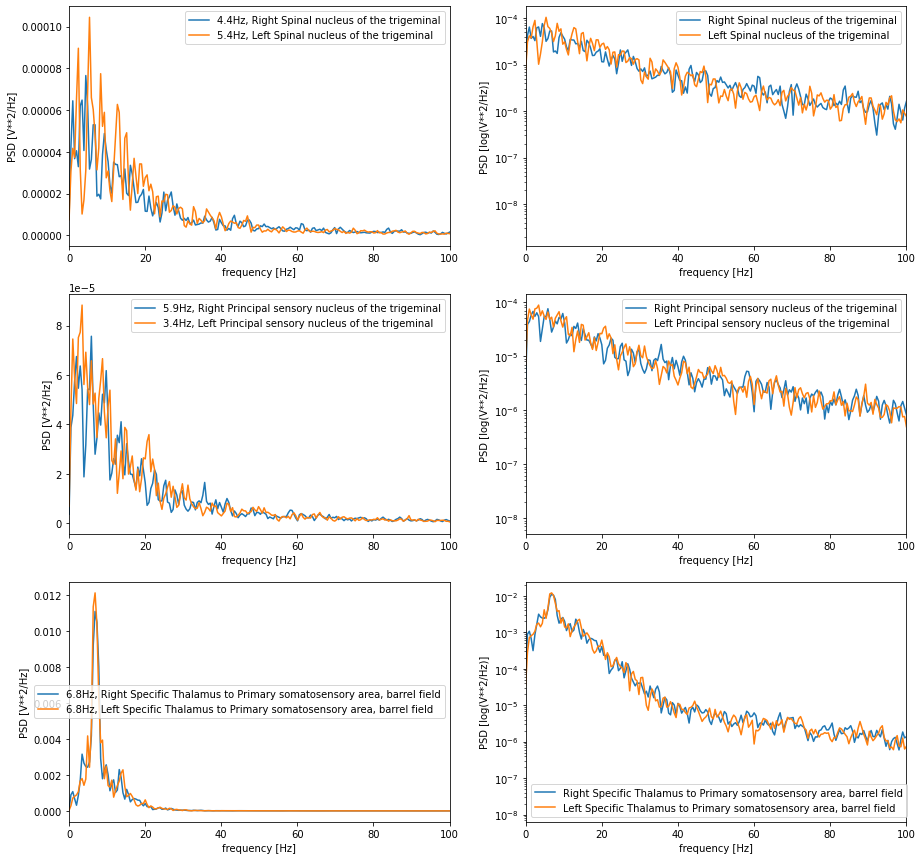

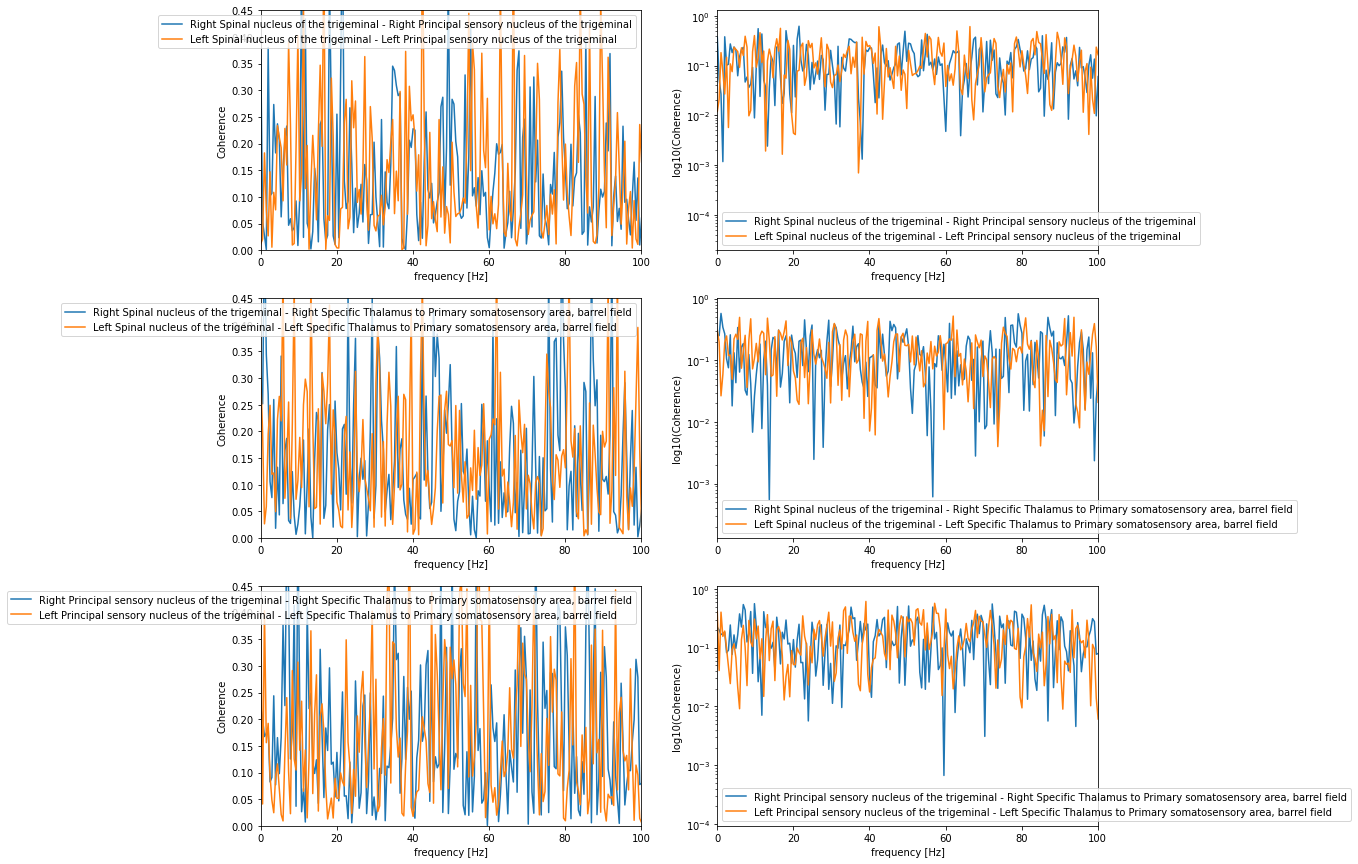

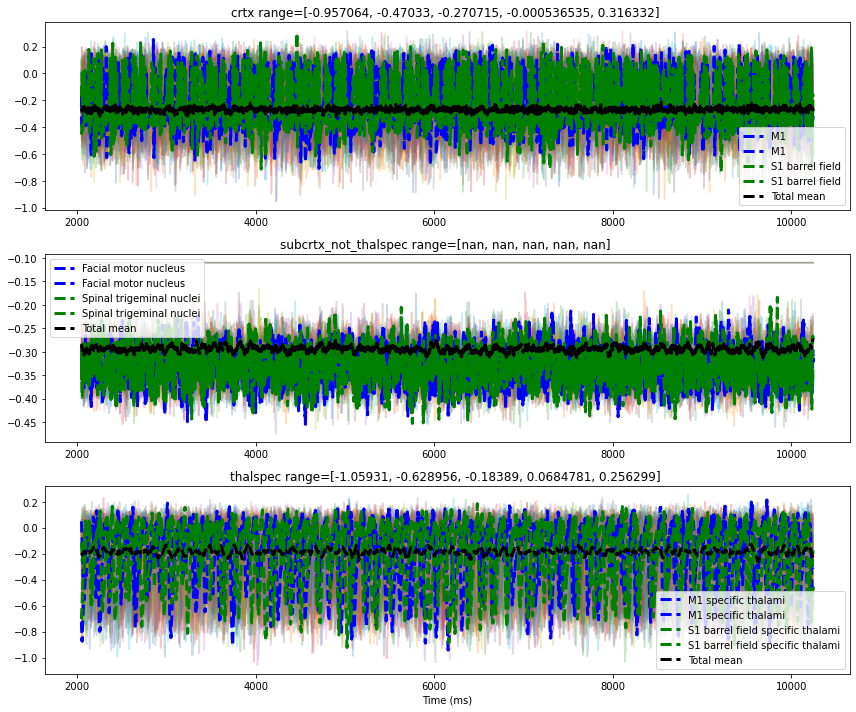

In [12]:
source_ts = plot_tvb(transient, inds, results=results, source_ts=None, bold_ts=None,
                     simulator=simulator, plotter=plotter, config=config, write_files=write_files)[0]

In [13]:
# Get spike events from NEST spike recorders
events = nest_network.output_devices['mossy_fibers']['Right Ansiform lobule'].get_events()

In [30]:
# Compute approximate average rate of mossy fibers as:
# number_of_spikes / (number_of_neurons * time_length_in_ms) * 1000 (to convert to spikes/sec)

duration = 2000.0  
n_spikes = np.sum(events['times'] > events['times'][-1] - duration)
print("Approximate mossy_fibers rate during the last %g ms = %g" % 
      (duration, n_spikes / 
                  (nest_network.output_devices['mossy_fibers']['Right Ansiform lobule'].number_of_neurons 
                   * duration) * 1000))



Approximate mossy_fibers rate during the last 2000 ms = 3.57265


In [15]:
# Node coupling values towards all regions for the last synchronization time:
node_coupling = simulator._loop_compute_node_coupling(simulator.current_step)
# min, mean, max values to get a feeling of scale:
print([node_coupling.min(), node_coupling.mean(), node_coupling.max()])
print(node_coupling[0][inds["ansilob"]])  # node_coupling[cvar, region_id, mode]
print(node_coupling[0][inds["oliv"]])

[0.0, 0.4635881, 8.525618]
[[3.955018 ]
 [4.4190607]]
[[3.7487655]
 [4.7123084]]


In [16]:
# The last values in the TVB -> NEST transformer input buffer 
# (i.e., node couplines towards mossy fibers region nodes, i.e., towards Ansiform Lobule)
simulator.output_interfaces.interfaces[0].transformer.input_buffer
# simulator.input_interfaces.interfaces[0].transformer.input_buffer

array([[4.380747 , 4.3465066, 4.3087454, 4.234237 , 4.212908 , 4.12213  ,
        4.051301 , 4.079145 , 4.017241 , 3.955018 ],
       [4.272853 , 4.2897673, 4.305444 , 4.389432 , 4.4549155, 4.4137454,
        4.4133267, 4.4368067, 4.396352 , 4.4190607]], dtype=float32)

In [17]:
# Transformer output buffer rates, after scaling in the transformer with the scale_factor parameter
simulator.output_interfaces.interfaces[0].transformer.output_buffer
# simulator.input_interfaces.interfaces[0].transformer.output_buffer


array([[2.5668437, 2.5467813, 2.5246556, 2.4809983, 2.4685006, 2.4153104,
        2.373809 , 2.390124 , 2.353852 , 2.3173933],
       [2.5036247, 2.5135355, 2.522721 , 2.5719328, 2.610302 , 2.586179 ,
        2.5859337, 2.5996914, 2.5759873, 2.5892935]], dtype=float32)

In [18]:
# The rates that were transferred to the corresponding spike generator device in NEST:
simulator.output_interfaces.interfaces[0].proxy.target[0].Get()
# simulator.input_interfaces.interfaces[0].proxy.source[0].Get()

{'allow_offgrid_times': True,
 'element_type': 'stimulator',
 'frozen': False,
 'global_id': 63825,
 'label': '',
 'local': True,
 'model': 'inhomogeneous_poisson_generator',
 'node_uses_wfr': False,
 'origin': 0.0,
 'rate_times': array([10242.05, 10242.15, 10242.25, 10242.35, 10242.45, 10242.55,
        10242.65, 10242.75, 10242.85, 10242.95]),
 'rate_values': array([2.56684375, 2.5467813 , 2.52465558, 2.48099828, 2.46850061,
        2.41531038, 2.3738091 , 2.39012408, 2.35385203, 2.3173933 ]),
 'start': 0.0,
 'stimulus_source': '0',
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 63824,
 'vp': 0}

In [19]:
# !!!TAKES TOO MUCH TIME AND FREEZES KERNEL!!!
# plot_nest_results(nest_network, neuron_models, neuron_number, config)